In [23]:
#!/usr/bin/python3.6
# -*- coding: utf-8 -*-

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import sklearn
import math
import os
import sys
import time

plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签

from tensorflow import keras
from tensorflow.keras.preprocessing import image

In [17]:
from cigarcabinclassify.classifier import CategoricalClassifier, SparseClassifier, ResnetClassifier

In [18]:
test_path = "/opt/tv/tmp"

In [19]:
basepath = "/opt/tv"

In [20]:
height = 128
width = 128
channels = 3
init_filters = 16
train_dir = basepath + "/training/training"

In [21]:
cc = CategoricalClassifier("/opt/tv/", 5, 32, 60)

In [22]:
test_predict1 = cc.predict(test_path)

Found 893 images belonging to 20 classes.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
batch_normalization_16 (Batc (None, 128, 128, 16)      64        
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 128, 128, 16)      2320      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
batch_normalization_17 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_35 (C

In [8]:
pc = SparseClassifier("/opt/cigarimg", 6, 32, 60)
test_predict2 = pc.predict(test_path)

Found 891 images belonging to 20 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 128, 16)      64        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 128, 16)      2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_13 (C

In [9]:
rc = ResnetClassifier("/opt/cigarimg", 5, 32, 60)
test_predict3 = rc.predict(test_path)

Found 891 images belonging to 20 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
batch_normalization_11 (Batc (None, 128, 128, 16)      64        
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 128, 128, 16)      2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
batch_normalization_12 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_25 (C

In [10]:
dir1 = os.listdir(test_path)
dict_result = {}
for file_name in dir1:
    dict_result[file_name] = np.argmax(np.bincount([test_predict1[file_name],test_predict2[file_name],test_predict2[file_name]]))
print(dict_result)


{'5.jpg': 19, '14.jpg': 7, '18.jpg': 1, '13.jpg': 14, '19.jpg': 9, '12.jpg': 12, '9.jpg': 6, '6.jpg': 5, '20.jpg': 11, '7.jpg': 1, '17.jpg': 13, '1.jpg': 8, '11.jpg': 17, '2.jpg': 0, '16.jpg': 4, '15.jpg': 15, '0.jpg': 10, '4.jpg': 3, '21.jpg': 15, '3.jpg': 16, '8.jpg': 2, '10.jpg': 2, '22.jpg': 14}


In [11]:
def getCigarDateframe():
    file_name = './csv/cigar_map.csv'
    df = pd.read_csv(file_name, dtype={'code': str, 'name': str})
    return df

In [12]:
df_cigar = getCigarDateframe()
cigar_map = dict(zip(df_cigar.code, df_cigar.name))
cigar_list = df_cigar.code
indices_dict = dict(zip(df_cigar.code, range(len(cigar_list))))
print(cigar_map)
print(indices_dict)

{'0001': '万宝路', '0002': '中华', '0003': '中南海5mg', '0004': '中南海8mg', '0005': '利群软红', '0006': '利群阳光', '0007': '好好学习', '0008': '新版利群', '0009': '泰山大鸡', '0010': '泰山红将军', '0011': '泰山金将军', '0012': '玉溪初心', '0013': '玉溪软', '0014': '白沙硬', '0015': '白沙精品二代', '0016': '苏烟五星', '0017': '苏烟金砂', '0018': '阿诗玛', '0019': '黄山新制皖烟', '0020': '黄金叶小目标'}
{'0001': 0, '0002': 1, '0003': 2, '0004': 3, '0005': 4, '0006': 5, '0007': 6, '0008': 7, '0009': 8, '0010': 9, '0011': 10, '0012': 11, '0013': 12, '0014': 13, '0015': 14, '0016': 15, '0017': 16, '0018': 17, '0019': 18, '0020': 19}


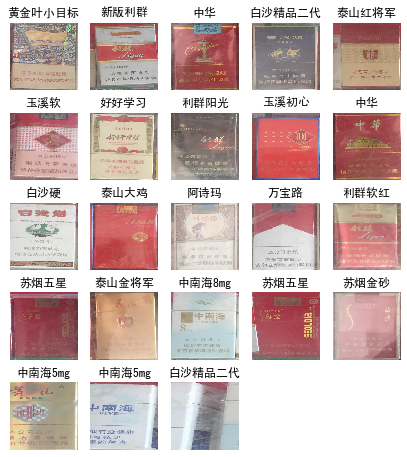

In [15]:
def show_imgs(n_cols, filepath, preds):
    assert n_cols > 0
    assert len(preds) > 0
    max_num = len(preds)
    keys = list(preds.keys())
    n_rows = math.ceil(max_num / n_cols)    #向上取整
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col 
            if index >= max_num:    #如果画完了就退出
                break
            temp_img = image.load_img(filepath + keys[index], target_size = (128, 128))
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(temp_img, cmap="binary",
                       interpolation = 'nearest')
            plt.axis('off')
            plt.title(cigar_map[cigar_list[preds[keys[index]]]])
    plt.show()
    
show_imgs(5, "/opt/tv/tmp/predict/", dict_result)